# _LLM Modellerini API ile Kullanma_

### _İmport_

In [1]:
#pip install openai

In [2]:
#pip install ollama

In [3]:
#pip install arxiv

In [4]:
#pip install feedparser

### _OpenAI_

In [5]:
# OpenAI (OpenRouter uyumlu) Python istemcisini içe aktarıyoruz
from openai import OpenAI

# OpenRouter API bağlantısını oluşturuyoruz
client = OpenAI(
  base_url="https://openrouter.ai/api/v1",  # OpenRouter API uç noktası
  api_key="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",  # Buraya OpenRouter API anahtarını güvenli bir şekilde eklemelisin
)

# Sohbet bazlı bir tamamlama isteği oluşturuyoruz
completion = client.chat.completions.create(
  extra_headers={
    "HTTP-Referer": "<YOUR_SITE_URL>",  # İsteğe bağlı: Siten OpenRouter’da görünür olur (ranking için)
    "X-Title": "<YOUR_SITE_NAME>",  # İsteğe bağlı: Uygulama adı görünür olur
  },
  model="nvidia/nemotron-nano-12b-v2-vl:free",  # Kullanmak istediğimiz model
  messages=[
    {
      "role": "user",  # Kullanıcı mesajı
      "content": "What is the meaning of life?"  # Modele sorduğumuz soru
    }
  ]
)

# Modelin döndürdüğü cevabı yazdırıyoruz
print(completion.choices[0].message.content)

The question of life's meaning is profound and multifaceted, with answers varying across disciplines and individuals. Here's a structured overview of key perspectives:

### 1. **Philosophical Perspectives**  
   - **Existentialism**: Philosophers like Jean-Paul Sartre and Albert Camus argue that life has no inherent meaning; existence is absurd. However, individuals can create their own purpose through choices and actions. Camus, in *The Myth of Sisyphus*, suggests embracing life's struggle itself as meaningful.  
   - **Nihilism**: Challenges the idea of objective meaning, positing that life is inherently meaningless. Yet, some nihilists advocate crafting personal significance despite this.  
   - **Aristotle’s Eudaimonia**: Suggests the goal of life is to flourish (eudaimonia) through virtue, reason, and fulfilling one’s potential.

### 2. **Religious and Spiritual Views**  
   - **Abrahamic Faiths** (Judaism, Christianity, Islam): Purpose often involves serving God, living ethically

### _Ollama_

Generated image: ...

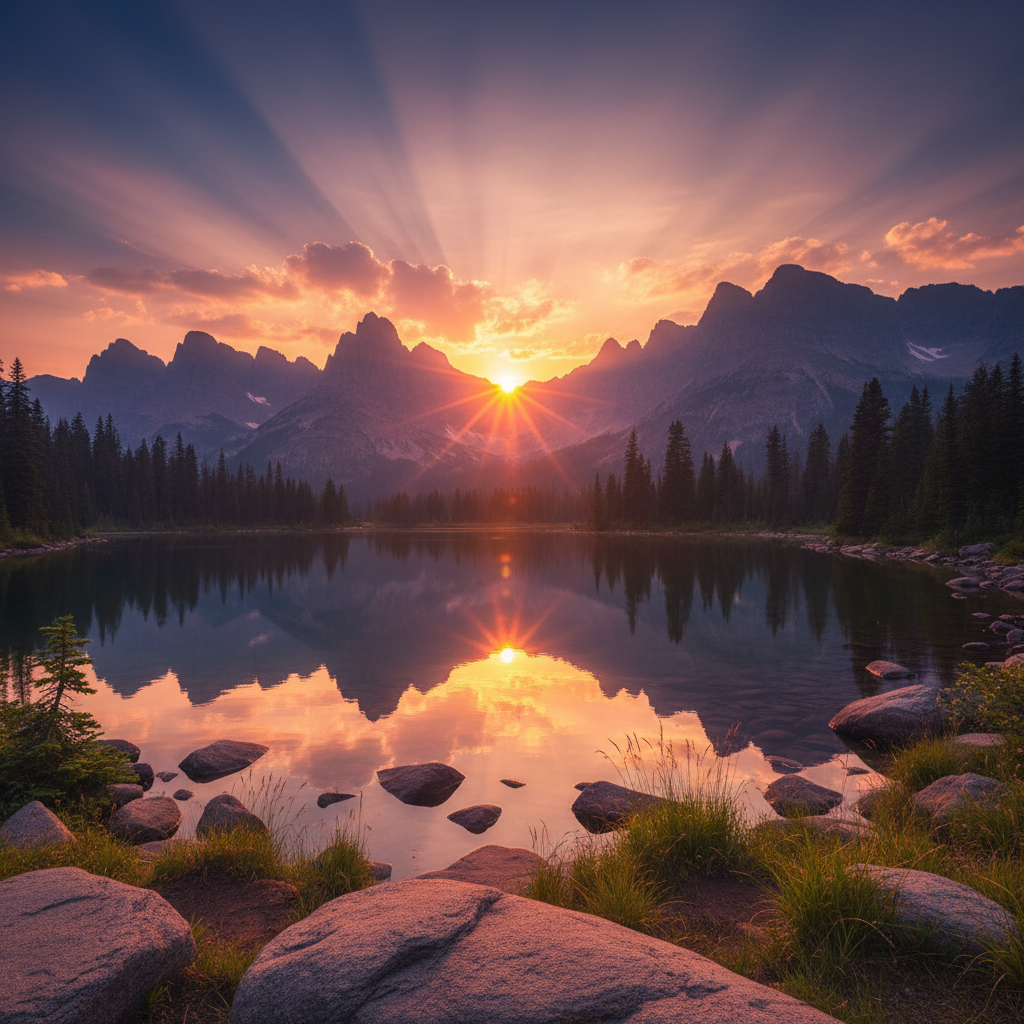

In [6]:
import requests
import json

url = "https://openrouter.ai/api/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {'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'}",
    "Content-Type": "application/json"
}

payload = {
    "model": "google/gemini-2.5-flash-image-preview",
    "messages": [
        {
            "role": "user",
            "content": "Generate a beautiful sunset over mountains"
        }
    ],
    "modalities": ["image", "text"]
}

response = requests.post(url, headers=headers, json=payload)
result = response.json()

# The generated image will be in the assistant message
if result.get("choices"):
    message = result["choices"][0]["message"]
    if message.get("images"):
        for image in message["images"]:
            image_url = image["image_url"]["url"]  # Base64 data URL
            print(f"Generated image: {image_url}...")

In [7]:
import ollama  # Ollama kütüphanesini içe aktarıyoruz. (Yapay zeka modeliyle iletişim kurmak için kullanılır.)

# 'llama3.2-vision:latest' adlı modeli kullanarak bir görüşme başlatıyoruz
res = ollama.chat(
    model='llama3.2-vision:latest',  # Kullanılacak AI modeli
    messages=[
        {
            'role': 'user',  # Mesajın kullanıcı tarafından gönderildiğini belirtiyoruz
            'content': 'extract text from this image', # Modele iletilen komut/istek
            'images': ['typewritten.png']
        }
    ]
)

# Modelden gelen cevabı ekrana yazdırıyoruz
# res sözlüğü içinde mesajın içeriğine erişip onu gösteriyoruz
print(res['message']['content'])

Here is the text extracted from the image:

KAYSER BONDOR
LIMITED
UNDERWEAR DIVISION
BIGGLESWADE BEDS.
Telephone: BIGGLESWADE 1371
15th March, 1963.

Miss D. Payne,
6, Lawnside,
Biggleswade.

Dear Miss D. Payne,

Just a reminder that we are expecting you to call at the Personnel Office on Wednesday, 24th April between 2 p.m. and 4 p.m. to be fixed up with your overall prior to commencing employment with this Company.

Will you please bring with you your Insurance Card and also your Birth Certificate.

Arrangements have been made for you to commence training on Monday, 29th April at 9 a.m. Your normal hours of work will be 8 a.m. to 5.30 p.m. The dinner hour is from 12.30 p.m. to 1.30 p.m. and there is a ten minute break in the morning and afternoon.

Your starting rate will be 1/11d per hour. Insurance contributions amounting to 5/7d and 4d Benevolent Fund subscriptions will be deducted each week from your wages.

We have a special scheme for providing dinner in the canteen at a reduce

In [8]:
import ollama  # Ollama kütüphanesini içe aktarıyoruz. (Yapay zeka modeliyle iletişim kurmak için kullanılır.)

# 'llama3.2-vision:latest' adlı modeli kullanarak bir görüşme başlatıyoruz
# Modelden "Bana kısa bir şarkı sözü yaz" şeklinde bir istek gönderiyoruz
res = ollama.chat(
    model='llama3.2-vision:latest',  # Kullanılacak AI modeli
    messages=[
        {
            'role': 'user',  # Mesajın kullanıcı tarafından gönderildiğini belirtiyoruz
            'content': 'Bana kısa bir şarkı sözü yaz'  # Modele iletilen komut/istek
        }
    ]
)

# Modelden gelen cevabı ekrana yazdırıyoruz
# res sözlüğü içinde mesajın içeriğine erişip onu gösteriyoruz
print(res['message']['content'])

"Yalnızlıkta bile bana ne? 
Duydumda ne? 
Bana ne? 
Duydumda ne?"


In [9]:
import ollama  # Ollama kütüphanesini içe aktarıyoruz. (Yapay zeka modeliyle iletişim kurmak için kullanılır.)

# 'llama3.2-vision:latest' adlı modeli kullanarak bir görüşme başlatıyoruz
res = ollama.chat(
    model='llama3.2-vision:latest',  # Kullanılacak AI modeli
    messages=[
        {
            'role': 'user',  # Mesajın kullanıcı tarafından gönderildiğini belirtiyoruz
            'content': 'extract text from this image', # Modele iletilen komut/istek
            'images': ['typewritten.png']
        }
    ]
)

# Modelden gelen cevabı ekrana yazdırıyoruz
# res sözlüğü içinde mesajın içeriğine erişip onu gösteriyoruz
print(res['message']['content'])

Here is the text extracted from the image:

KAYSER BONDOR LTD.
UNDERWEAR DIVISION
BIGGLESWADE BEDS.
Telephone: BIGGLESWADE 1171.
15th March, 1963.
Miss D. Payne,
6, Lawnside,
Biggleswade.
Dear Miss D. Payne,
Just a reminder that we are expecting you to call at the Personnel Office on Wednesday, 24th April between 2 p.m. and 4 p.m. to be fixed up with your overall prior to commencing employment with this Company.
Will you please bring with you your Insurance Card and also your Birth Certificate.
Arrangements have been made for you to commence training on Monday, 29th April at 9 a.m. Your normal hours of work will be 8 a.m. to 5.30 p.m. The dinner hour is from 12.30 p.m. to 1.30 p.m. and there is a ten minute break in the morning and afternoon.
Your starting rate will be 1/11d per hour. Insurance contributions amounting to 5/74 and 4d Benevolent Fund subscriptions will be deducted each week from your wages.
We have a special scheme for providing dinner in the canteen at a reduced rate fo

Generated image: ...

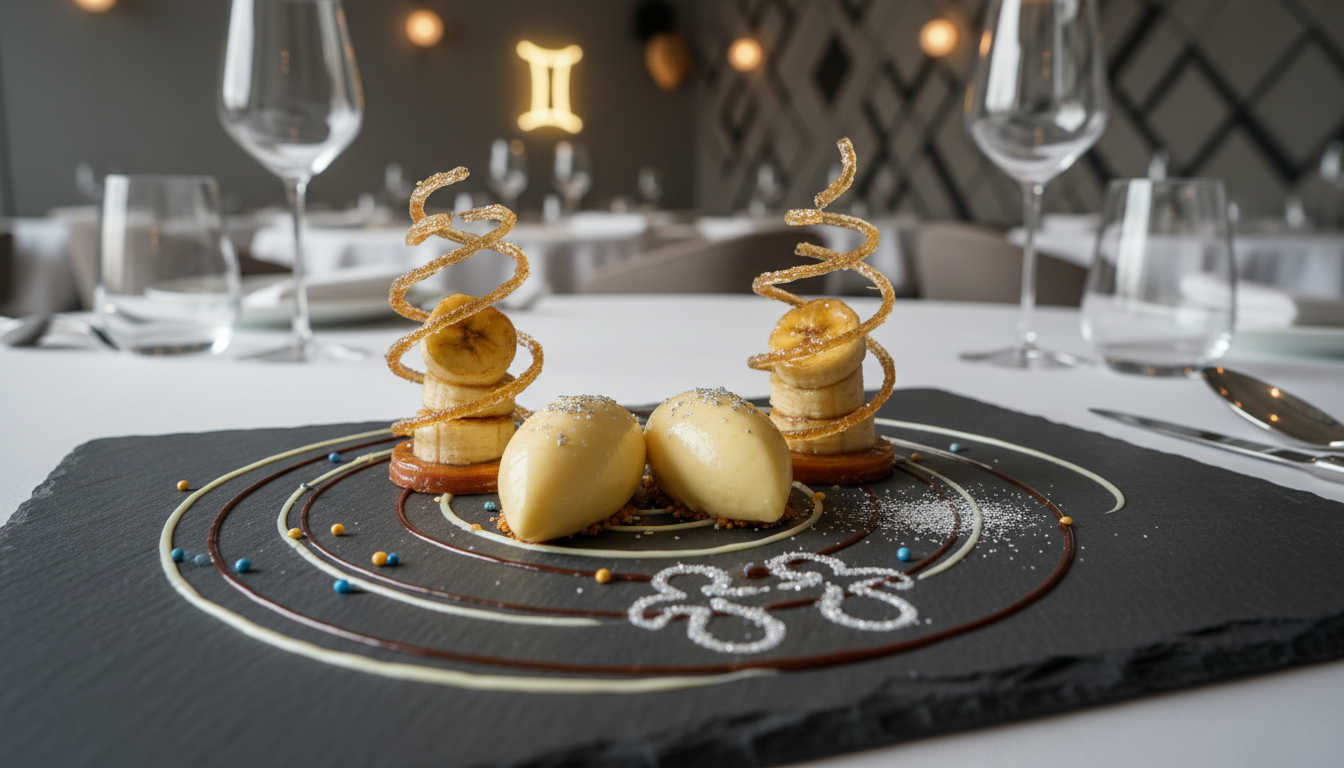

In [10]:
import requests
import json

url = "https://openrouter.ai/api/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {'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'}",
    "Content-Type": "application/json"
}

payload = {
    "model": "google/gemini-2.5-flash-image-preview",
    "messages": [
        {
            "role": "user",
            "content": "Create a picture of a nano banana dish in a fancy restaurant with a Gemini theme"
        }
    ],
    "modalities": ["image", "text"],
    "image_config": {
        "aspect_ratio": "16:9"
    }
}

response = requests.post(url, headers=headers, json=payload)
result = response.json()

if result.get("choices"):
    message = result["choices"][0]["message"]
    if message.get("images"):
        for image in message["images"]:
            image_url = image["image_url"]["url"]
            print(f"Generated image: {image_url}...")


In [11]:
import arxiv
import feedparser
import requests
from bs4 import BeautifulSoup
from datetime import datetime

# ----------- 1. Fetch Academic Papers from arXiv -----------
def fetch_arxiv_papers(query="hydrogen energy", max_results=3):
    search = arxiv.Search(
        query=query,
        max_results=max_results,
        sort_by=arxiv.SortCriterion.SubmittedDate
    )
    papers = []
    for result in search.results():
        papers.append({
            "title": result.title.strip(),
            "summary": result.summary.strip(),
            "url": result.entry_id
        })
    return papers

# ----------- 2. Fetch News from Google News RSS -----------
def fetch_google_news(query="hydrogen energy", max_articles=3):
    url = f"https://news.google.com/rss/search?q={query.replace(' ', '+')}&hl=en-US&gl=US&ceid=US:en"
    feed = feedparser.parse(url)
    news_items = []
    for entry in feed.entries[:max_articles]:
        news_items.append({
            "title": entry.title.strip(),
            "summary": entry.summary.strip(),
            "link": entry.link
        })
    return news_items

# ----------- 3. Scrape Company News from Plug Power -----------
def scrape_plug_power_news(max_articles=3):
    url = "https://www.plugpower.com/news/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    articles = soup.select("div.news-list-item")
    news_items = []
    for article in articles[:max_articles]:
        title = article.select_one("h3").get_text(strip=True)
        summary = article.select_one("p").get_text(strip=True)
        link = article.find("a")["href"]
        news_items.append({
            "title": title,
            "summary": summary,
            "link": link
        })
    return news_items

# ----------- 4. Summarize using OpenRouter model -----------
def summarize_items_openrouter(items, section_title, api_key):
    combined_text = "\n\n".join([f"Title: {item['title']}\nSummary: {item['summary']}" for item in items])
    prompt = f"""You're an energy analyst. Summarize the following {section_title.lower()} into 3–5 concise bullet points:\n\n{combined_text}"""

    response = requests.post(
        "https://openrouter.ai/api/v1/chat/completions",
        json={
            "model": "qwen/qwen2.5-vl-32b-instruct:free",
            "messages": [
                {
                    "role": "user",
                    "content": prompt
                }
            ]
        },
        headers={
            "Authorization": f"Bearer {api_key}"
        }
    )

    result = response.json()
    return result["choices"][0]["message"]["content"].strip()

# ----------- 5. Build the Daily Report -----------
def build_daily_report(api_key):
    today = datetime.today().strftime('%Y-%m-%d')
    report = f"# 🔋 Daily Hydrogen Energy Report ({today})\n\n"

    print("Fetching academic papers from arXiv...")
    arxiv_data = fetch_arxiv_papers()

    print("Fetching news from Google News...")
    google_news_data = fetch_google_news()

    print("Scraping Plug Power company news...")
    plug_news_data = scrape_plug_power_news()

    print("Summarizing arXiv papers with OpenRouter...")
    arxiv_summary = summarize_items_openrouter(arxiv_data, "Academic Papers", api_key)
    report += "## 📘 Academic Papers (arXiv)\n" + arxiv_summary + "\n\n"

    print("Summarizing news articles with OpenRouter...")
    news_summary = summarize_items_openrouter(google_news_data, "News Articles", api_key)
    report += "## 🗞 News Articles (Google News)\n" + news_summary + "\n\n"

    print("Summarizing Plug Power news with OpenRouter...")
    company_summary = summarize_items_openrouter(plug_news_data, "Company News", api_key)
    report += "## 🏭 Company Update: Plug Power\n" + company_summary + "\n\n"

    return report

# ----------- 6. Run It! -----------
if __name__ == "__main__":
    API_KEY = "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"  # Replace with your actual API key
    final_report = build_daily_report(API_KEY)
    print(final_report)

Fetching academic papers from arXiv...


C:\Users\13tua\AppData\Local\Temp\ipykernel_21464\3199699074.py:15: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():


Fetching news from Google News...
Scraping Plug Power company news...
Summarizing arXiv papers with OpenRouter...
Summarizing news articles with OpenRouter...
Summarizing Plug Power news with OpenRouter...
# 🔋 Daily Hydrogen Energy Report (2025-11-17)

## 📘 Academic Papers (arXiv)
Here are concise summaries of the three academic papers, each distilled into 3–5 bullet points:

---

### **Title: Implicit inference of the reionization history with higher-order statistics of the 21-cm signal**
- Investigates the potential of the Square Kilometre Array Observatory (SKAO) to constrain the Epoch of Reionization (EoR) using the redshifted 21-cm signal.
- Explores various statistics derived from the 21-cm signal, including Gaussian (spherical and cylindrical power spectra) and non-Gaussian (Betti numbers and bispectrum) measures.
- Uses mock observations in SKAO's AA* configuration with noise levels for 100 and 1000 hours, applying an implicit inference framework to infer posterior distribution